# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

Crimes : https://www.kaggle.com/AnalyzeBoston/crimes-in-boston#crime.csv
NBA : https://www.kaggle.com/drgilermo/nba-players-stats#Seasons_Stats.csv
YouTube: https://www.kaggle.com/datasnaek/youtube-new#USvideos.csv
VideoGames : https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
BoxOffice : https://www.kaggle.com/eliasdabbas/boxofficemojo-alltime-domestic-data

In [15]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', None)
%matplotlib notebook

# Read Files

In [16]:
NBA = pd.read_csv('NBA_Seasons_Stats.csv')
Games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
Youtube = pd.read_csv('USyoutubevideos.csv')
Movies = pd.read_csv('boxoffice.csv')
Crime = pd.read_csv('crime.csv', encoding = 'Latin_1')
Airbnb = pd.read_csv('listings_summary.csv')

# Video Game Sales - Sales in North America

In [17]:
GamesAcrossAllPlatforms = Games.groupby('Name')

GamesSales = []

for game, GameSales in GamesAcrossAllPlatforms:
        GamesSales.append([game,GameSales['NA_Sales'].sum()])

In [18]:
DfGameSales = pd.DataFrame(GamesSales)
DfGameSales.columns = ['Game Title','NA Sales (in millions of units)']
DfGameSales.sort_values('NA Sales (in millions of units)', ascending = False)

"""Reset the bin values so they start at zero and the bin edges are whole numbers"""
#higher and lower for range
GamesLower, GamesHigher = int(DfGameSales['NA Sales (in millions of units)'].min()), int(DfGameSales['NA Sales (in millions of units)'].max())
#Number of bins to split
nBins = 20
#define the bin edges
GamesBinEdges = range(GamesLower,GamesHigher, (GamesHigher - GamesLower)//nBins)
#Change the bin labels 
GamesBinLabels = ['(%d, %d]'%(GamesBinEdges[i],GamesBinEdges[i+1]) for i in range(len(GamesBinEdges)-1)]
#Values to cut into bins
values = DfGameSales['NA Sales (in millions of units)']
CutValues = pd.cut(values,bins = nBins,labels = GamesBinLabels, include_lowest=True)

#add bins to dataframe
DfGameSales['bins'] = CutValues

DfGamesSalesBins = DfGameSales.groupby('bins')
MostSellingGame = DfGameSales.sort_values('NA Sales (in millions of units)').iloc[-1]
AggGameSales = 0
NumberOfGames = 0

for SalesBin, GameSalesData in DfGamesSalesBins:
    SortBySales = (GameSalesData.sort_values('NA Sales (in millions of units)').reset_index())

    #calcuate the number of games, sales added together from the bottom, it takes to equal the sales earned by the top
    #selling game
    for i in range(len(SortBySales)):
        if AggGameSales < MostSellingGame[1]:
            AggGameSales += SortBySales['NA Sales (in millions of units)'].iloc[i]
            NumberOfGames += 1



# NBA Basketball - Points Scored

In [19]:
TotalPoints = NBA['PTS'].sum()

PlayerPoints = []
GroupByPlayer = NBA.groupby('Player')

for player, points in GroupByPlayer:
    PlayerPoints.append([player,points['PTS'].sum()])

DfPlayerPoints = pd.DataFrame(PlayerPoints)
DfPlayerPoints.columns = ['Player', 'PTS']

In [20]:
"""Reset the bin values so they start at zero and the bin edges are whole numbers"""
PtsLower, PtsHigher = int(DfPlayerPoints['PTS'].min()), int(DfPlayerPoints['PTS'].max())
nBinsPts = 20
PtsBinEdges = range(PtsLower,PtsHigher, (PtsHigher- PtsLower)//nBins)
PtsBinLabels = ['(%d, %d]'%(PtsBinEdges[i],PtsBinEdges[i+1]) for i in range(len(PtsBinEdges)-1)]
PtsValues = DfPlayerPoints['PTS']
PtsCutValues = pd.cut(PtsValues, bins = nBinsPts, labels = PtsBinLabels, include_lowest=True)
DfPlayerPoints['bins'] = PtsCutValues

"""Calculate the bottom aggregate value that add up to the top performing player"""
DfPtsBins = DfPlayerPoints.groupby('bins')
HighestScoringPlayer = DfPlayerPoints.sort_values('PTS').iloc[-1]
AggPts = 0
NumberOfPlayers = 0

for PtsBin, PtsData in DfPtsBins:
    SortByPts = (PtsData.sort_values('PTS').reset_index())

    for i in range(len(SortByPts)):
        if AggPts < HighestScoringPlayer[1]:
            AggPts += SortByPts['PTS'].iloc[i]
            NumberOfPlayers += 1

## YouTube Views - Number of Views  per Channel Distribution

In [21]:
YoutubeByChannel = Youtube.groupby('channel_title')
ChannelByViews = []

for channel, data in YoutubeByChannel:
    ChannelByViews.append([channel,data['views'].sum()])
DfChannelByViews = pd.DataFrame(ChannelByViews)
DfChannelByViews.columns = ['Channel Name','Total Views']

In [22]:
"""Reset the bin values so they start at zero and the bin edges are whole numbers"""
ViewsLower, ViewsHigher = int(DfChannelByViews['Total Views'].min()), int(DfChannelByViews['Total Views'].max())
nBinsViews = 20
ViewsBinEdges = range(ViewsLower,ViewsHigher, (ViewsHigher- ViewsLower)//nBins)
ViewsBinLabels = ['(%d, %d]'%(ViewsBinEdges[i],ViewsBinEdges[i+1]) for i in range(len(ViewsBinEdges)-1)]
ViewsValues = DfChannelByViews['Total Views']
ViewsCutValues = pd.cut(ViewsValues, bins = nBinsViews, labels = ViewsBinLabels, include_lowest=True)
DfChannelByViews['bins'] = ViewsCutValues

"""Calculate the bottom aggregate value that add up to the top performing player"""
DfViewsBins = DfChannelByViews.groupby('bins')
MostViewedChannel = DfChannelByViews.sort_values('Total Views').iloc[-1]
AggViews = 0
NumberOfChannels = 0

for ViewsBin, ViewsData in DfViewsBins:
    SortByViews = (ViewsData.sort_values('Total Views').reset_index())
    for i in range(len(SortByViews)):
        if AggViews < MostViewedChannel[1]:
            AggViews += SortByViews['Total Views'].iloc[i]
            NumberOfChannels += 1

## Movies Gross Earnings

In [23]:
MoviesCutValues = pd.cut(Movies['lifetime_gross'], bins = 20)
Movies['bins'] = MoviesCutValues

"""Calculate the bottom aggregate value that add up to the top performing player"""
DfEarningsBins = Movies.groupby('bins')
HighestEarningMovie = Movies.sort_values('lifetime_gross').iloc[-1]
AggEarnings = 0
NumberOfMovies = 0

for EarningsBin, EarningsData in DfEarningsBins:
    SortByEarnings = (EarningsData.sort_values('lifetime_gross').reset_index())
    for i in range(len(SortByEarnings)):
        if AggEarnings < HighestEarningMovie[3]:
            AggEarnings += SortByEarnings['lifetime_gross'].iloc[i]
            NumberOfMovies += 1


## Crimes in Boston by Reporting Area 

In [24]:
GroupedByReportinArea = Crime.groupby('REPORTING_AREA')
ListCrimes = []

for area, crimes in GroupedByReportinArea:
    ListCrimes.append([area,len(crimes)])

DfCrimes = pd.DataFrame(ListCrimes)
DfCrimes.columns = ['Area','Number of Crimes']
DfCrimes.sort_values('Number of Crimes', ascending = False)
DfCrimes = (DfCrimes.reset_index().drop('index', axis = 1)).drop(0)

In [25]:
CrimesCutValues = pd.cut(DfCrimes['Number of Crimes'], bins = 20)
DfCrimes['bins'] = CrimesCutValues

"""Calculate the bottom aggregate value that add up to the top performing player"""
DfCrimesBins = DfCrimes.groupby('bins')
MostCrimeArea = DfCrimes.sort_values('Number of Crimes').iloc[-1]
AggCrimes = 0
NumberOfAreas = 0

for CrimesBin, CrimesData in DfCrimesBins:
    SortByCrimes = (CrimesData.sort_values('Number of Crimes').reset_index())
    for i in range(len(SortByCrimes)):
        if AggCrimes < MostCrimeArea[1]:
            AggCrimes += SortByCrimes['Number of Crimes'].iloc[i]
            NumberOfAreas += 1

## AirBnB Reviews in Berlin

In [26]:
ReviewsCutValues = pd.cut(Airbnb['number_of_reviews'], bins = 20)
Airbnb['bins'] = ReviewsCutValues
DfAirbnb = Airbnb[['name','number_of_reviews','bins']]

"""Calculate the bottom aggregate value that add up to the top performing player"""
DfAirbnbBins = DfAirbnb.groupby('bins')
MostReviewed = DfAirbnb.sort_values('number_of_reviews').iloc[-1]
AggReviews = 0
NumberOfLocations = 0

for ReviewsBin, ReviewsData in DfAirbnbBins:
    SortByReviews = (ReviewsData.sort_values('number_of_reviews').reset_index())
    for i in range(len(SortByReviews)):
        if AggReviews < MostReviewed[1]:
            AggReviews += SortByReviews['number_of_reviews'].iloc[i]
            NumberOfLocations += 1

# Plotting all the data

<IPython.core.display.Javascript object>


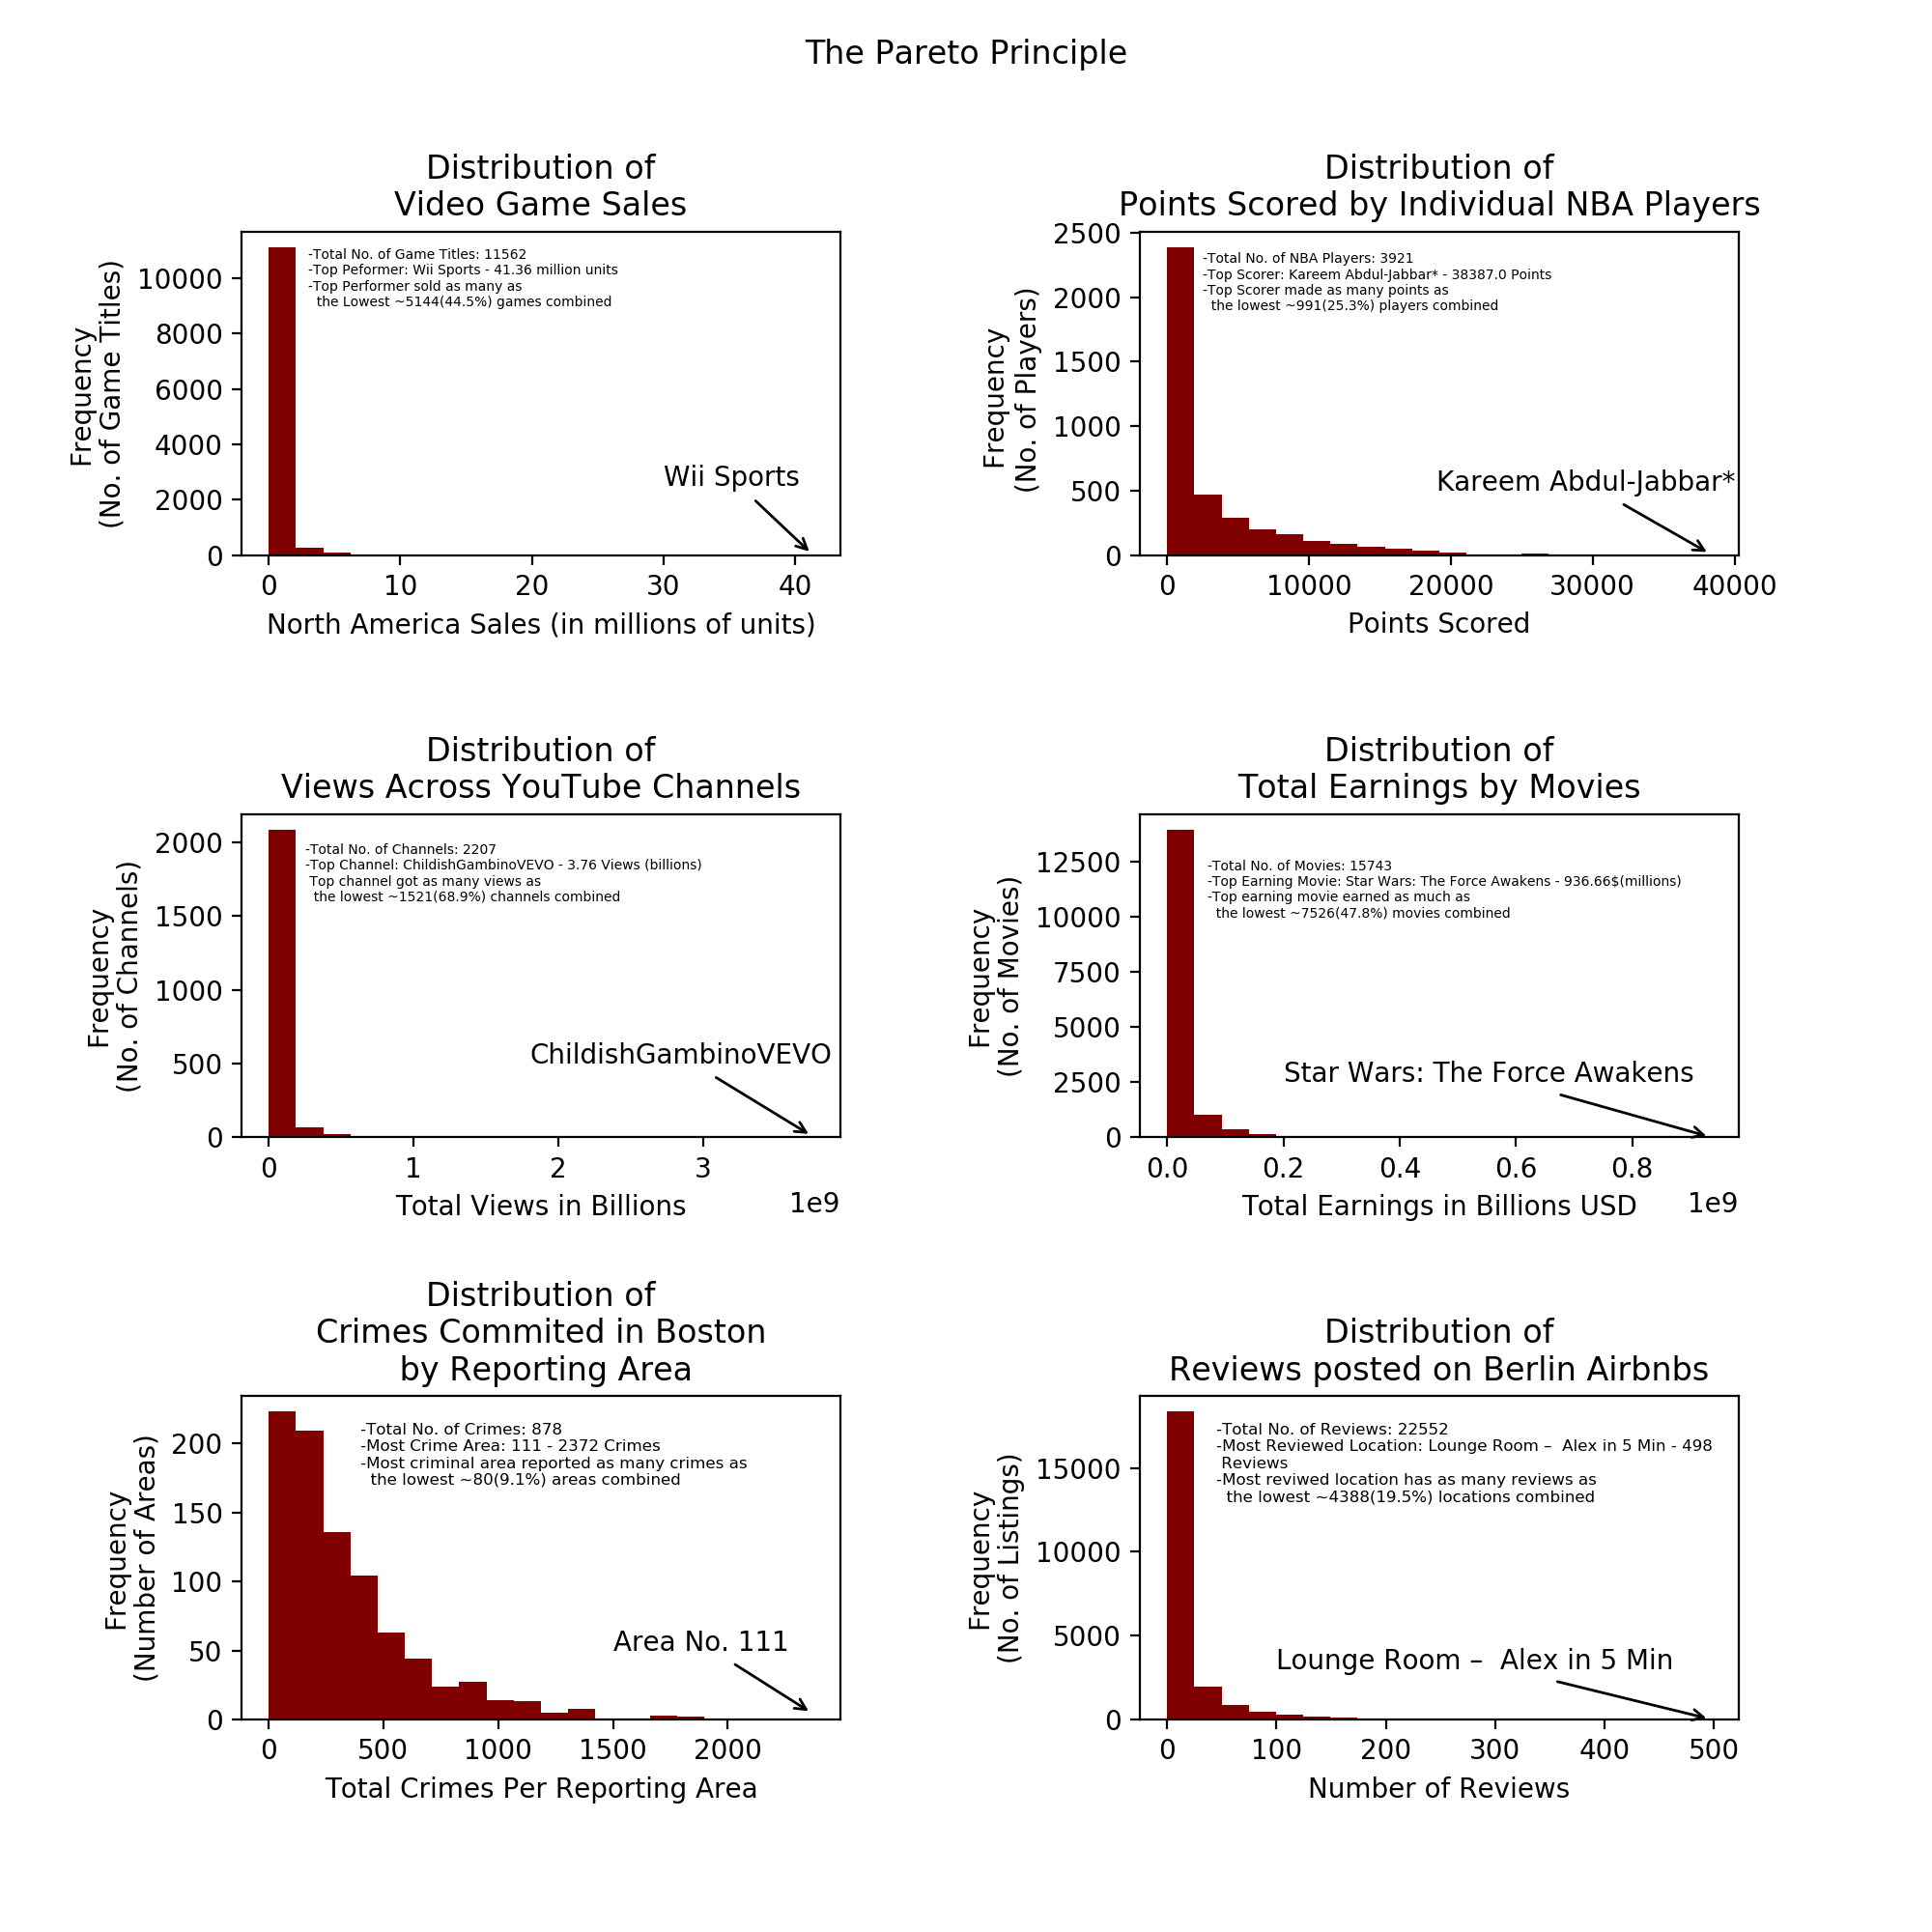

Text(100, 3000, 'Lounge Room –  Alex in 5 Min')

In [31]:
fig , ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize = (10,10))
fig.suptitle('The Pareto Principle')
fig.subplots_adjust(hspace = 0.8, wspace = 0.5)
plotcolor = 'maroon'

ax1.hist(DfGameSales['NA Sales (in millions of units)'],bins = 20, color = plotcolor)
ax1.set_title('Distribution of\nVideo Game Sales')
ax1.set_xlabel('North America Sales (in millions of units)')
ax1.set_ylabel('Frequency\n(No. of Game Titles)')
ax1.text(3, 9000, '-Total No. of Game Titles: {}\n-Top Peformer: {} - {} million units\n-Top Performer sold as many as \n  the Lowest ~{}({}%) games combined'.format(len(DfGameSales),MostSellingGame[0], MostSellingGame[1], NumberOfGames,round((NumberOfGames/len(DfGameSales))*100,1)), fontdict = dict(fontsize = 5,color='black'))
ax1.annotate(MostSellingGame[0],xy = [MostSellingGame[1], 1], xytext=(30,2500), arrowprops=dict(edgecolor='black', arrowstyle='->'))

ax2.hist(DfPlayerPoints['PTS'],bins = 20, color = plotcolor)
ax2.set_title('Distribution of\nPoints Scored by Individual NBA Players')
ax2.set_xlabel('Points Scored')
ax2.set_ylabel('Frequency \n (No. of Players)')
ax2.text(2500, 1900, '-Total No. of NBA Players: {}\n-Top Scorer: {} - {} Points\n-Top Scorer made as many points as\n  the lowest ~{}({}%) players combined'.format(len(DfPlayerPoints),HighestScoringPlayer[0], HighestScoringPlayer[1], NumberOfPlayers,round((NumberOfPlayers/len(DfPlayerPoints))*100,1)), fontdict = dict(fontsize = 5,color='black'))
ax2.annotate(HighestScoringPlayer[0],xy = [HighestScoringPlayer[1], 4], xytext=(19000,500), arrowprops=dict(edgecolor='black', arrowstyle='->'))

ax3.hist(DfChannelByViews['Total Views'], bins = 20, color = plotcolor)
ax3.set_title('Distribution of\nViews Across YouTube Channels')
ax3.set_xlabel('Total Views in Billions')
ax3.set_ylabel('Frequency\n(No. of Channels)')
ax3.text(250000000, 1600, '-Total No. of Channels: {}\n-Top Channel: {} - {} Views (billions)\n Top channel got as many views as\n  the lowest ~{}({}%) channels combined'.format(len(DfChannelByViews),(MostViewedChannel[0]), round((MostViewedChannel[1])/1000000000,2), NumberOfChannels,round((NumberOfChannels/len(DfChannelByViews))*100,1)), fontdict = dict(fontsize = 5,color='black'))
ax3.annotate(MostViewedChannel[0],xy = [MostViewedChannel[1], 4], xytext=(1800000000,500), arrowprops=dict(edgecolor='black', arrowstyle='->'))

ax4.hist(Movies['lifetime_gross'], bins = 20, color = plotcolor)
ax4.set_title('Distribution of\nTotal Earnings by Movies')
ax4.set_xlabel('Total Earnings in Billions USD')
ax4.set_ylabel('Frequency\n(No. of Movies)')
ax4.text(70000000, 10000, '-Total No. of Movies: {}\n-Top Earning Movie: {} - {}$(millions)\n-Top earning movie earned as much as\n  the lowest ~{}({}%) movies combined'.format(len(Movies),(HighestEarningMovie[1]), round(HighestEarningMovie[3]/1000000,2), NumberOfMovies,round((NumberOfMovies/len(Movies))*100,1)), fontdict = dict(fontsize = 5,color='black'))
ax4.annotate(HighestEarningMovie[1],xy = [HighestEarningMovie[3], 0.1], xytext=(200000000,2500), arrowprops=dict(edgecolor='black', arrowstyle='->'))

ax5.hist(DfCrimes['Number of Crimes'], bins = 20, color = plotcolor)
ax5.set_title('Distribution of\nCrimes Commited in Boston\n by Reporting Area')
ax5.set_xlabel('Total Crimes Per Reporting Area')
ax5.set_ylabel('Frequency\n(Number of Areas)')
ax5.text(400, 170, '-Total No. of Crimes: {}\n-Most Crime Area: {} - {} Crimes\n-Most criminal area reported as many crimes as\n  the lowest ~{}({}%) areas combined'.format(len(DfCrimes),(MostCrimeArea[0]), MostCrimeArea[1], NumberOfAreas,round((NumberOfAreas/len(DfCrimes))*100,1)), fontdict = dict(fontsize = 6,color='black'))
ax5.annotate('Area No. {}'.format(MostCrimeArea[0]),xy = [MostCrimeArea[1], 4], xytext=(1500,50), arrowprops=dict(edgecolor='black', arrowstyle='->'))

ax6.hist(Airbnb['number_of_reviews'], bins = 20, color = plotcolor)
ax6.set_title('Distribution of\nReviews posted on Berlin Airbnbs')
ax6.set_xlabel('Number of Reviews')
ax6.set_ylabel('Frequency\n(No. of Listings)')
ax6.text(45, 13000, '-Total No. of Reviews: {}\n-Most Reviewed Location: {} - {} \n Reviews\n-Most reviwed location has as many reviews as\n  the lowest ~{}({}%) locations combined'.format(len(DfAirbnb),(MostReviewed[0]), MostReviewed[1], NumberOfLocations,round((NumberOfLocations/len(DfAirbnb))*100,1)), fontdict = dict(fontsize = 6,color='black'))
ax6.annotate(MostReviewed[0],xy = [MostReviewed[1], 4], xytext=(100,3000), arrowprops=dict(edgecolor='black', arrowstyle='->'))

In [14]:
plt.savefig('cat2.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>